#Importando bibliotecas, lendo dados e visualizando

Importando bibliotecas

In [1]:
#Bibliotecas do Keras
from keras.datasets.fashion_mnist import load_data
from keras.layers import Dense, Conv2D, MaxPool2D, GaussianNoise, Reshape, Conv2DTranspose
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model


#Bibliotecas auxiliares
import numpy as np
import matplotlib.pyplot as plt


Lendo dados de treino e teste, dividindo dados para validação e visualizando

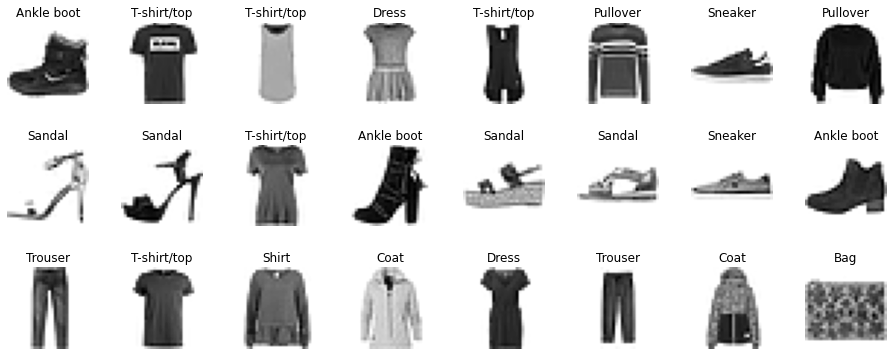

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:55000], X_train_full[55000:]
y_train, y_valid = y_train_full[:55000], y_train_full[55000:] 

targets = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
                 "Shirt", "Sneaker", "Bag", "Ankle boot"]
n_rows = 3
n_cols = 8
plt.figure(figsize=(n_cols * 2, n_rows * 2))
for row in range(n_rows):
    for col in range(n_cols)  :
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary")
        plt.axis('off')
        plt.title(targets[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

#Criando encoder e decoder para o autoencoder

Criando encoder

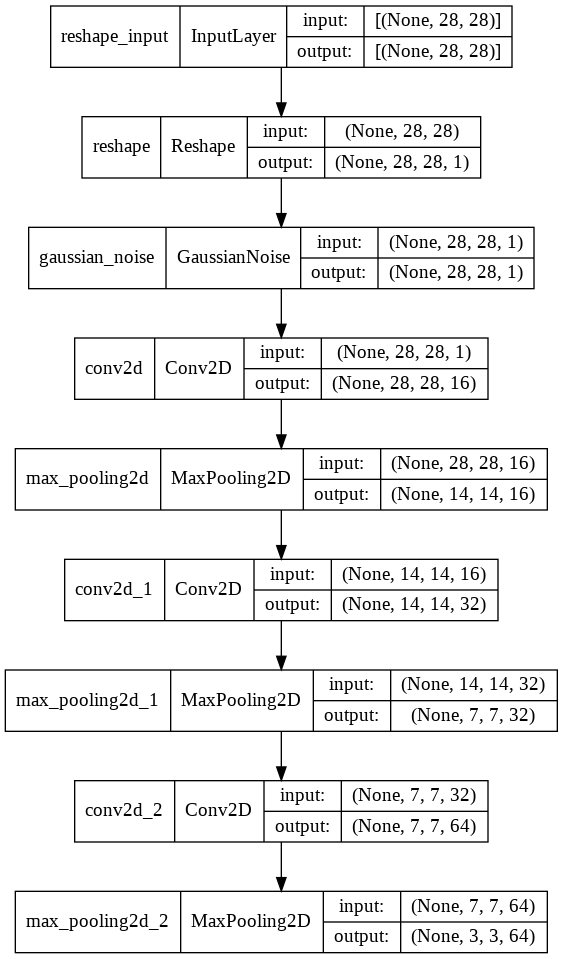

In [3]:
denoising_encoder = Sequential([
    Reshape([28, 28, 1], input_shape=[28, 28]),
    GaussianNoise(0.2),
    Conv2D(16, kernel_size=3, padding="SAME", activation="selu"),
    MaxPool2D(pool_size=2),
    Conv2D(32, kernel_size=3, padding="SAME", activation="selu"),
    MaxPool2D(pool_size=2),
    Conv2D(64, kernel_size=3, padding="SAME", activation="selu"),
    MaxPool2D(pool_size=2)
])

plot_model(denoising_encoder, to_file='denoising_encoder.png', show_shapes=True)

Criando decoder

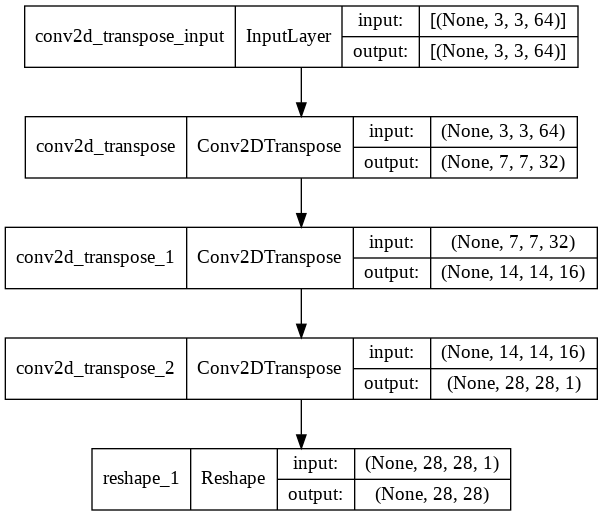

In [4]:
denoising_decoder = Sequential([
    Conv2DTranspose(32, kernel_size=3, strides=2, padding="VALID", activation="selu",
                                 input_shape=[3, 3, 64]),
    Conv2DTranspose(16, kernel_size=3, strides=2, padding="SAME", activation="selu"),
    Conv2DTranspose(1, kernel_size=3, strides=2, padding="SAME", activation="sigmoid"),
    Reshape([28, 28])
])

plot_model(denoising_decoder, to_file='denoising_decoder.png', show_shapes=True)

Criando autoencoder

In [5]:
denoising_ae = Sequential([denoising_encoder, denoising_decoder])
denoising_ae.compile(loss="binary_crossentropy", optimizer=SGD(lr=0.5))
history = denoising_ae.fit(X_train, X_train, epochs=5,
                      validation_data=(X_valid, X_valid))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/5
1719/1719 [==============================] - 60s 35ms/step - loss: 0.3161 - val_loss: 0.2921
Epoch 2/5
1719/1719 [==============================] - 59s 34ms/step - loss: 0.2868 - val_loss: 0.2821
Epoch 3/5
1719/1719 [==============================] - 59s 34ms/step - loss: 0.2821 - val_loss: 0.2794
Epoch 4/5
1719/1719 [==============================] - 59s 34ms/step - loss: 0.2796 - val_loss: 0.2760
Epoch 5/5
1719/1719 [==============================] - 59s 34ms/step - loss: 0.2777 - val_loss: 0.2781


#Visualizando resultados

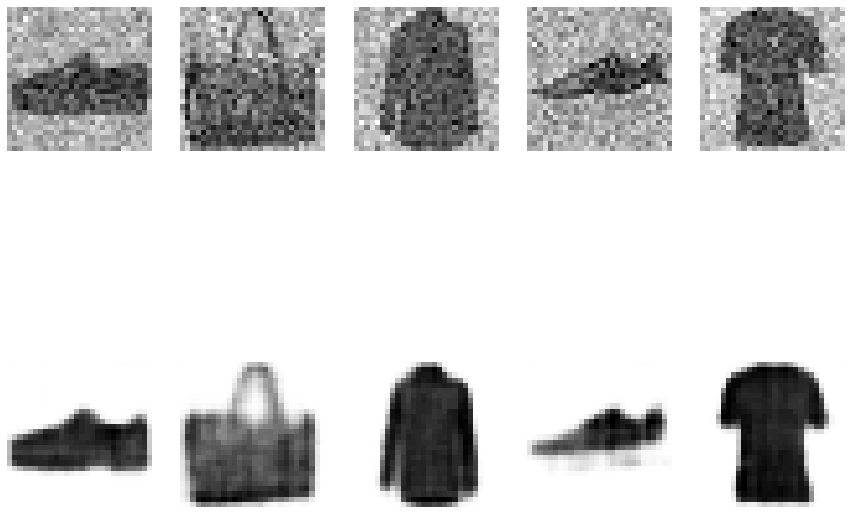

In [6]:
corrupted_inputs = GaussianNoise(0.2)(X_valid[8:13], training=True)
reconstructs = denoising_ae.predict(corrupted_inputs)
plt.figure(figsize=(15,12))
for i in range(5):
    plt.subplot(2,5,1+i)
    plt.imshow(corrupted_inputs[i], cmap='binary')
    plt.axis('off')
    plt.subplot(2,5,6+i)
    plt.imshow(reconstructs[i], cmap='binary')
    plt.axis('off')
plt.show()